# Hubway System Data - EDA and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
from scipy import stats
from scipy.stats import norm
import pylab as pl
import plotly
import plotly.figure_factory as ff
%matplotlib inline

In [2]:
current_path=os.getcwd()

##### Saving all the weather filenames in a list that are in a folder- Weather Data

In [3]:
filelist=[]
for file in os.listdir(os.path.join(current_path,"Weather Data")):
    glob.iglob(os.path.join(current_path,"*.csv"),recursive=True)
    filelist.append(file)

In [4]:
filelist

['humidity.csv',
 'pressure.csv',
 'temperature.csv',
 'wind_direction.csv',
 'wind_speed.csv']

##### All the weather csv files will be saved in separate dataframes, they contain data for a couple of big cities but we will just consider Boston because we need this data to align with our Hubway Data which is just for Boston!

In [5]:
humidity=pd.read_csv(os.path.join(current_path,"Weather Data",filelist[0]),parse_dates=['datetime'],infer_datetime_format=True)
pressure=pd.read_csv(os.path.join(current_path,"Weather Data",filelist[1]),parse_dates=['datetime'],infer_datetime_format=True)
temp=pd.read_csv(os.path.join(current_path,"Weather Data",filelist[2]),parse_dates=['datetime'],infer_datetime_format=True)
wind_dir=pd.read_csv(os.path.join(current_path,"Weather Data",filelist[3]),parse_dates=['datetime'],infer_datetime_format=True)
wind_speed=pd.read_csv(os.path.join(current_path,"Weather Data",filelist[4]),parse_dates=['datetime'],infer_datetime_format=True)


In [6]:
humidity=humidity[['datetime','Boston']]
humidity=humidity.rename(columns={'Boston':'Humidity'})
temp=temp[['datetime','Boston']]
temp=temp.rename(columns={'Boston':'Temperature'})
pressure=pressure[['datetime','Boston']]
pressure=pressure.rename(columns={'Boston':'Pressure'})
wind_speed=wind_speed[['datetime','Boston']]
wind_speed=wind_speed.rename(columns={'Boston':'WindSpeed'})
wind_dir=wind_dir[['datetime','Boston']]
wind_dir=wind_dir.rename(columns={'Boston':'WindDirection'})

In [7]:
weather_df=humidity.merge(temp,on='datetime').merge(pressure,on='datetime').merge(wind_speed,on='datetime').merge(wind_dir,on='datetime')

##### Now we have our master_df with all the weather variables in one place. One more slicing that we will have to do is on time because our Hubway Trip Data is from 2015- 2017(just for the months of January)  

In [8]:
weather_df=weather_df[weather_df['datetime'].dt.year>2014]
weather_df=weather_df[weather_df['datetime'].dt.month<2]

Checking the datatypes in our weather dataframe

In [9]:
weather_df.dtypes

datetime         datetime64[ns]
Humidity                float64
Temperature             float64
Pressure                float64
WindSpeed               float64
WindDirection           float64
dtype: object

** The final weather dataframe **

In [10]:
weather_df.head(10)

,datetime,Humidity,Temperature,Pressure,WindSpeed,WindDirection
19716,2015-01-01 00:00:00,100.0,269.413500,1035.0,3.0,260.0
19717,2015-01-01 01:00:00,100.0,268.801667,1034.0,4.0,259.0
19718,2015-01-01 02:00:00,100.0,268.403333,1034.0,4.0,251.0
19719,2015-01-01 03:00:00,100.0,268.585500,1033.0,4.0,252.0
19720,2015-01-01 04:00:00,100.0,267.993667,1033.0,4.0,241.0
19721,2015-01-01 05:00:00,100.0,267.982333,1033.0,5.0,240.0
19722,2015-01-01 06:00:00,100.0,268.415000,1032.0,5.0,246.0
19723,2015-01-01 07:00:00,100.0,268.255667,1031.0,5.0,242.0
19724,2015-01-01 08:00:00,100.0,268.540333,1031.0,6.0,245.0
19725,2015-01-01 09:00:00,100.0,268.094000,1031.0,6.0,252.0


### Now working on loading the Trip Data and running some basic quality and statistics check on it

In [11]:
path=os.path.join(current_path,"Hubway System Data")


In [12]:
tripdata=glob.iglob(os.path.join(path,"*hubway-tripdata*.csv"),recursive=True)
df=(pd.read_csv(file,parse_dates=['starttime','stoptime'],infer_datetime_format=True) for file in tripdata)
tripdata=pd.concat(df,ignore_index=True)


###### Trip Duration is in seconds, to get a better perspective of the information we will change it to minutes.

In [13]:
tripdata['tripduration']=tripdata['tripduration']/60

##### Since Trip Duration is the only numerical variable, we will check the basic statistics for it and see the kind of distribution it has.

In [14]:
tripdata['tripduration'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
tripduration,39413.0,18.28495,703.849137,1.016667,4.983333,7.05,10.916667,129483.016667


##### One look at the statistics summary and we can see that we have some anomalies in the data, the mean seems okay but the Standard Deviations is way too high.

##### One other thing that we know about Hubway for sure that no matter if you have a one day pass or a monthly pass you only get a free ride for 30 minutes and after that for each additional 30 minutes you have to give 3 dollars(roughly 12,000 dollars for a bike ride, sounds a little wrong)

In [15]:
plotly.tools.set_credentials_file(username='chawla.i', api_key='GO0fWKwAwO5nF8ekiJvt')

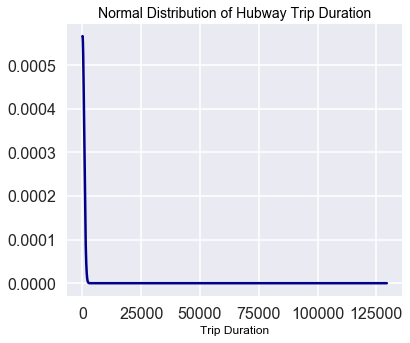

In [16]:
sb.set(rc={'figure.figsize':(6,5)})
sb.set_style("darkgrid")
sb.set_context("poster")
x_axis = np.arange(tripdata['tripduration'].min(), tripdata['tripduration'].max(), 1)
#x_axis_log = np.arange(math.log10(master_min), math.log10(master_max), math.log10(1.01))
#plt.figure(1)
#plt.subplot(211)
plt.plot(x_axis, norm.pdf(x_axis,tripdata['tripduration'].mean(),tripdata['tripduration'].std()),color='DarkBlue',linewidth=2.5)
plt.xlabel('Trip Duration', fontsize=12,color='Black')
plt.title('Normal Distribution of Hubway Trip Duration', fontsize=14,color='Black')
#plt.subplot(212)
#plt.plot(x_axis, norm.pdf(x_axis_log,math.log10(master_mean),math.log10(master_sd)),color='Red',marker='x')
plt.show()

##### So trip duration is not normally distributed, a major reason being a major chunk of rides going on for over 4000 minutes, we will look into that scenario separately but for now we will try and check the distribution of trip durations again, this time we will take a log of trip duration and see if we get better results!

Text(0.5,1,' Log Normal Distribution of Hubway Trip Duration')

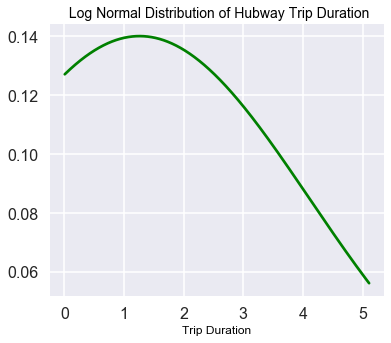

In [17]:
#plotting log normal distribution
sb.set(rc={'figure.figsize':(6,5)})
sb.set_style("darkgrid")
sb.set_context("poster")
x_axis = np.arange(math.log10(tripdata['tripduration'].min()), math.log10(tripdata['tripduration'].max()), math.log10(1.01))
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,math.log10(tripdata['tripduration'].mean()),math.log10(tripdata['tripduration'].std())),color='Green',linewidth=2.7)
plt.xlabel('Trip Duration', fontsize=12,color='Black')
plt.title(' Log Normal Distribution of Hubway Trip Duration', fontsize=14,color='Black')


In [18]:
import plotly.plotly as py
import plotly.graph_objs as go

In [19]:
sb.set(style='ticks')
trace= go.Box(y=tripdata.tripduration)
py.iplot([trace],validate=False)

##### So the box plot for our unclean data shows us that the median is 7 and the maximum value is 129.483k

** Looking at the conditions where our trip duration is less than 3 minutes and all the rides that start and get over at the same station under 1 minute. **

In [20]:
tripduration_error_min=tripdata[tripdata['tripduration']<3]
print("Total number of rides with Trip Duration less than 3 minutes =",len(tripduration_error_min))

Total number of rides with Trip Duration less than 3 minutes = 2005


In [21]:
same_station_error=tripduration_error_min[tripduration_error_min['start station id']==tripduration_error_min['end station id']]
print("There are",len(same_station_error), "rides that last less than 3 minutes and end and start at the same station")

There are 77 rides that last less than 3 minutes and end and start at the same station


##### To help us with our predictive analysis we will not include these rides.

** Now looking at the rides that last too long. **

In [22]:
tripduration_error_max=tripdata[tripdata['tripduration']>100]

In [23]:
tripduration_error_max.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1032,173.383333,2015-01-06 10:00:15,2015-01-06 12:53:39,118,Linear Park - Mass. Ave. at Cameron Ave.,42.397828,-71.130516,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,1279,Subscriber,1979,2
1356,102.216667,2015-01-07 14:05:26,2015-01-07 15:47:39,115,Porter Square Station,42.387995,-71.119084,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,983,Subscriber,1993,1
1495,2253.266667,2015-01-08 01:06:37,2015-01-09 14:39:54,90,Lechmere Station at Cambridge St / First St,42.370677,-71.076529,1,18 Dorrance Warehouse,42.387151,-71.075978,1081,Subscriber,1979,2
1739,969.116667,2015-01-08 22:29:50,2015-01-09 14:38:58,75,Lafayette Square at Mass Ave / Main St / Colum...,42.363465,-71.100573,1,18 Dorrance Warehouse,42.387151,-71.075978,654,Subscriber,\N,0
2013,1266.733333,2015-01-09 22:42:21,2015-01-10 19:49:05,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,33,Kenmore Sq / Comm Ave,42.348706,-71.097009,766,Customer,1987,2


In [24]:
print("Total number of rides with Trip Duration greater than 100 minutes =",len(tripduration_error_max))

Total number of rides with Trip Duration greater than 100 minutes = 231


###### We will focus on the trips that go on for over 4000 minutes

In [25]:
tripduration_error_max[tripduration_error_max['tripduration']>4000]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
8715,5167.016667,2016-01-04 17:03:12,2016-01-08 07:10:13,177,University Park,42.362648,-71.100061,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,646,Customer,1965,1
9202,129483.016667,2016-01-06 08:40:53,2016-04-05 07:43:55,118,Linear Park - Mass. Ave. at Cameron Ave.,42.397828,-71.130516,38,TD Garden - Causeway at Portal Park #2,42.366222,-71.059914,56,Subscriber,1987,1
10013,38408.716667,2016-01-07 17:31:22,2016-02-03 09:40:05,143,EF - North Point Park,42.369885,-71.069957,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,670,Subscriber,1988,1
10043,5218.516667,2016-01-07 17:59:14,2016-01-11 08:57:45,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,143,EF - North Point Park,42.369885,-71.069957,1076,Subscriber,1982,1
12678,5632.150000,2016-01-14 11:14:26,2016-01-18 09:06:35,72,One Broadway / Kendall Sq at Main St / 3rd St,42.362613,-71.084105,116,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,647,Customer,1978,2
12790,5756.516667,2016-01-14 15:40:16,2016-01-18 15:36:47,72,One Broadway / Kendall Sq at Main St / 3rd St,42.362613,-71.084105,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1114,Subscriber,1989,1
13804,25114.900000,2016-01-17 05:24:43,2016-02-03 15:59:38,115,Porter Square Station,42.387995,-71.119084,140,Danehy Park,42.388966,-71.132788,1097,Subscriber,\N,0
19198,8815.750000,2016-01-30 13:45:26,2016-02-05 16:41:12,75,Lafayette Square at Mass Ave / Main St / Colum...,42.363465,-71.100573,75,Lafayette Square at Mass Ave / Main St / Colum...,42.363465,-71.100573,1278,Subscriber,1986,1
25316,5524.950000,2017-01-06 17:49:41,2017-01-10 13:54:38,151,John F Fitzgerald - Surface Road at India Street,42.358155,-71.052163,1,18 Dorrance Warehouse,42.387151,-71.075978,1088,Subscriber,1987,1
33014,4186.966667,2017-01-21 15:15:54,2017-01-24 13:02:53,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100,1289,Customer,\N,0


In [26]:

df1=tripdata[(tripdata["tripduration"]< 100)  & (tripdata["tripduration"]  > 3)]

##### We create a new dataset with a cleaner version of the tripdata, and we will run some basic analysis on it, to see how is it looking.

##### Apart from trip duration having these anomalies , we also saw the the usertype has a couple of rows that are undefined and gender also has rows with values 0 which means undefined values but as of now they are not impacting our trip count so we will let them be, as removing them might rule out some trips that were valid

In [27]:
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,9.033333,2015-01-01 00:21:44,2015-01-01 00:30:47,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,277,Subscriber,1984,1
1,7.300000,2015-01-01 00:27:03,2015-01-01 00:34:21,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,648,Subscriber,1985,1
2,4.233333,2015-01-01 00:31:31,2015-01-01 00:35:46,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,555,Subscriber,1974,1
3,7.200000,2015-01-01 00:53:46,2015-01-01 01:00:58,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1307,Subscriber,1987,1
4,12.250000,2015-01-01 01:07:06,2015-01-01 01:19:21,105,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,-71.101427,177,Customer,1986,2


Text(0.5,1,'Cumulative Density Curve for Trip Duration')

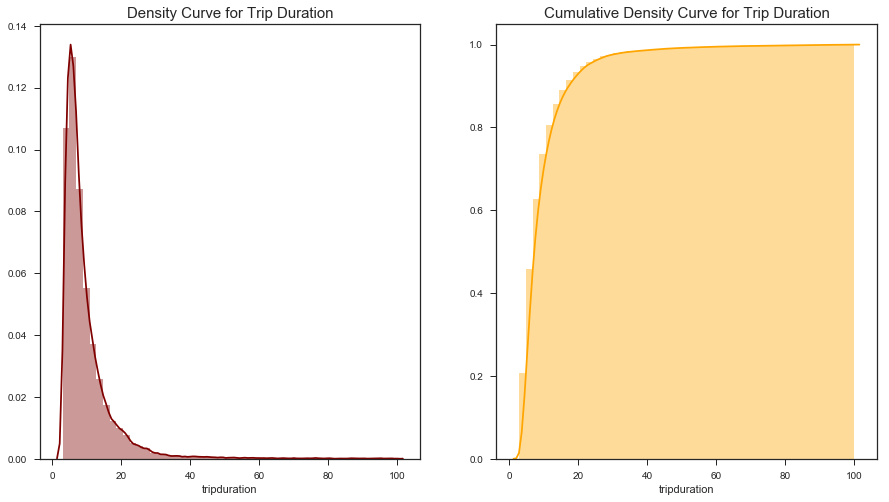

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,8))
sb.set_style("darkgrid")
#sb.set(rc={'figure.figsize':(8,9)})
sb.distplot(df1.tripduration,color='Maroon',ax=ax1)
ax1.set_title("Density Curve for Trip Duration",fontsize=15)
sb.distplot(df1.tripduration,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),color='Orange',ax=ax2)
ax2.set_title("Cumulative Density Curve for Trip Duration",fontsize=15)


** From our Density Curve we can easily tell the maximum number of rides in our new dataset have trip duration between 3-60 minutes.
While our second curve tells us that more than 98% of the total rides were done in less than 30 minutes. **

In [29]:
df1['tripduration'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
tripduration,37136.0,9.705051,8.263492,3.016667,5.266667,7.283333,11.116667,99.9


##### We see that after elimintaing all the anomalies we are getting our standard deviation looks normal and the maximum value for trip duration has also reached normal values

In [30]:
trace= go.Box(y=df1.tripduration)
py.iplot([trace],validate=False)

In [31]:
df1.dtypes

tripduration                      float64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                              int64
dtype: object

##### Looking at the datatypes, to check if we have consistent data types. 


** Moving the station information from our master information, we will just keep the id's in this dataset to make sure there we are not adding extra complexity **

In [32]:
df1_station_info=df1[['start station id','start station name','start station latitude','start station longitude','end station id', 'end station name','end station latitude','end station longitude']]

In [33]:
df1_station_info=df1_station_info.drop_duplicates(subset=None, keep='first', inplace=False)

In [34]:
df1=df1.drop(['start station name','start station longitude','end station name','end station longitude'], axis=1)

In [35]:
df1=df1.drop(['start station latitude','end station latitude'],axis=1)

In [36]:
df1.dtypes

tripduration               float64
starttime           datetime64[ns]
stoptime            datetime64[ns]
start station id             int64
end station id               int64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [47]:
weather_df=weather_df.groupby(['Year','Day'])[['Humidity','Temperature','Pressure','WindSpeed','WindDirection']].mean().reset_index()

#### Now we have our clean data set, we will merge this with the weather data to predict if we can get to the number of trips that will happen with having trip duration in the range 3-100

In [38]:
df1['Day']=df1['starttime'].dt.day
df1['Time subset']=df1['starttime'].dt.hour
df1['Day of Week']=df1['starttime'].dt.dayofweek
df1['Year']=df1['starttime'].dt.year

In [39]:
weather_df['Year']=weather_df['datetime'].dt.year
weather_df['Day']=weather_df['datetime'].dt.day

In [49]:
df1=pd.merge(df1, weather_df,on=['Day','Year'],how='inner')

In [55]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tripduration,37136.0,9.705051,8.263492,3.016667,5.266667,7.283333,11.116667,99.900000
start station id,37136.0,99.926379,39.568972,1.000000,74.000000,90.000000,115.000000,218.000000
end station id,37136.0,98.970810,39.905148,1.000000,74.000000,90.000000,115.000000,218.000000
bikeid,37136.0,1004.945525,394.436825,1.000000,737.000000,958.000000,1290.000000,1925.000000
gender,37136.0,1.175948,0.493020,0.000000,1.000000,1.000000,1.000000,2.000000
Day,37136.0,16.095191,9.004166,1.000000,8.000000,16.000000,24.000000,31.000000
Time subset,37136.0,13.612855,4.727242,0.000000,9.000000,14.000000,17.000000,23.000000
Day of Week,37136.0,2.783498,1.841661,0.000000,1.000000,3.000000,4.000000,6.000000
Year,37136.0,2016.297205,0.778061,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
Humidity,37136.0,81.568946,14.713978,45.250000,70.791667,84.333333,94.250000,100.000000


#### Now, our dataframe df1 has all the data and clean values, we will look at predicting the total trips using Regression Techniques.

# Machine Learning

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [57]:
corr=df1.corr()

#### Making a correlation matrix to see the dependability of all the variables on each other. Obviously we wont be using all the variables to make a prediction but this is just a starting insight

Text(0.5,1,'Correlation Matrix')

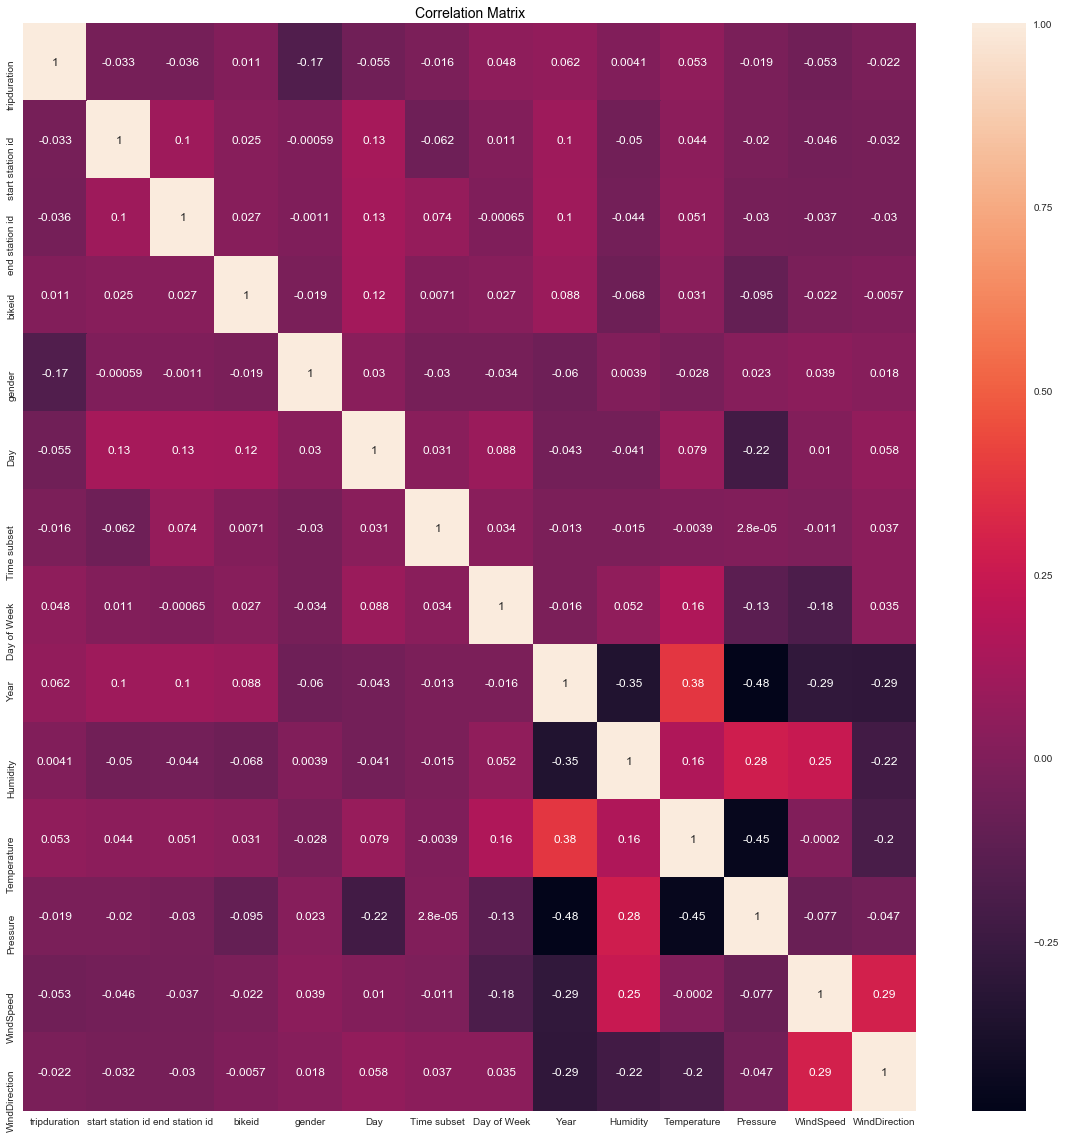

In [58]:
sb.set(rc={'figure.figsize':(20,20)})
sb.heatmap(corr,annot=True)
plt.title("Correlation Matrix",fontsize=14,color="Black")

Text(0.5,1,'Increase in rides over the past 3 years')

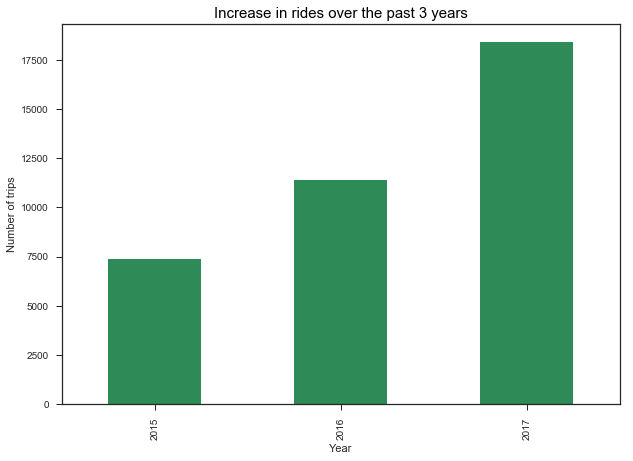

In [70]:
year=df1.groupby(['Year'])['tripduration'].count()
sb.set(rc={'figure.figsize':(10,7)})
sb.set_style("ticks")
year.plot(kind='bar',color="SeaGreen")
plt.ylabel("Number of trips")
plt.title("Increase in rides over the past 3 years",fontsize=15,color="Black")

#### An idea of how much the trips have increased over the past 3 years

In [71]:
import sklearn.linear_model as lm
import statsmodels.api as sm
from sklearn import linear_model

C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [72]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [73]:
from sklearn.metrics import r2_score

# Predicting the number of rides on a day!

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
master_df1=df1.groupby(['Year','Day']).agg({'tripduration':'count'}).reset_index()
master_df1.rename(columns={'tripduration':'Trip Count'},inplace=True)

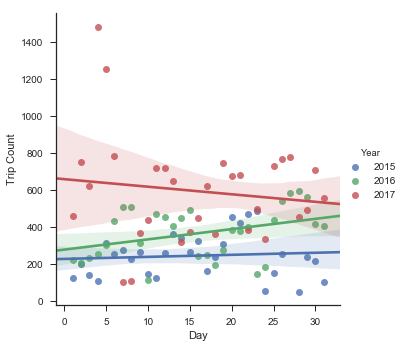

In [76]:
sb.lmplot(x='Day',y='Trip Count',hue='Year',data=master_df1)


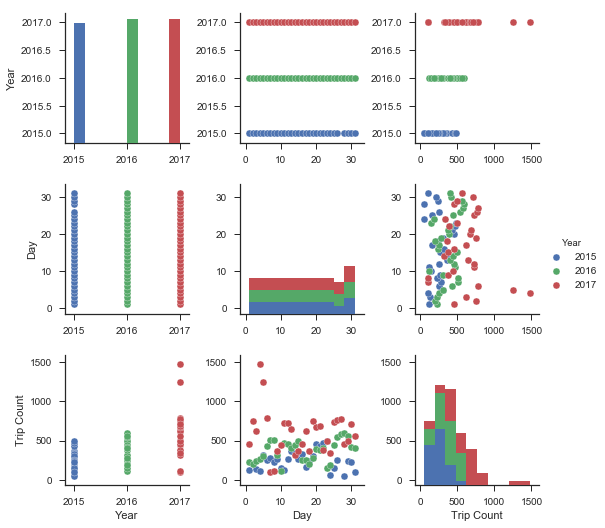

In [77]:
sb.pairplot(master_df1,hue='Year')

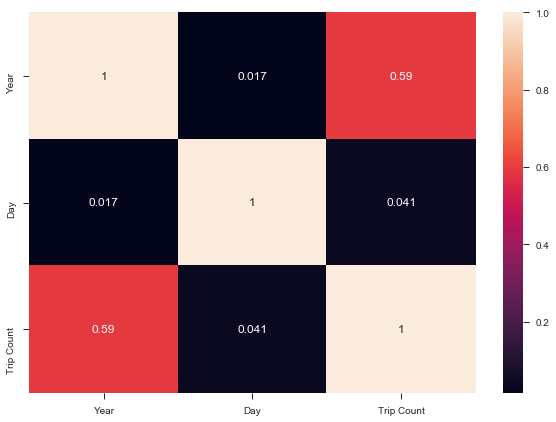

In [78]:
corr_master=master_df1.corr()
sb.heatmap(corr_master,annot=True)

In [79]:
independent_variables=['Year','Day']
x=master_df1[independent_variables]
y=master_df1['Trip Count']

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cross_validation import train_test_split
from sklearn import linear_model as lm

C:\Users\Isha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=1)

In [82]:
lm_master=LinearRegression()

#### Using scikit-learn

In [83]:
fit_1=lm_master.fit(x_train,y_train)

In [84]:
intercept=lm_master.intercept_

#### Using stats models

In [87]:
model=sm.OLS(y_train,x_train)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Trip Count   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     93.43
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           1.30e-20
Time:                        03:00:08   Log-Likelihood:                -506.79
No. Observations:                  73   AIC:                             1018.
Df Residuals:                      71   BIC:                             1022.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.2084      0.029      7.075      0.000       0.150       0.267
Day           -0.9031      3.362     -0.269      0.789      -7.607       5.801
==============================================================================
Omnibus:                       34.342   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.779
Skew:                           1.590   Prob(JB):                     7.82e-18
Kurtosis:                       6.973   Cond. No.                         228.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
result.params

Year    0.208379
Day    -0.903100
dtype: float64

#### So, our equation should look something like 
#### TotalTrips(y)= 0.208379*Year(x1)-0.903100*Day(x2)

In [89]:
from mpl_toolkits.mplot3d import Axes3D

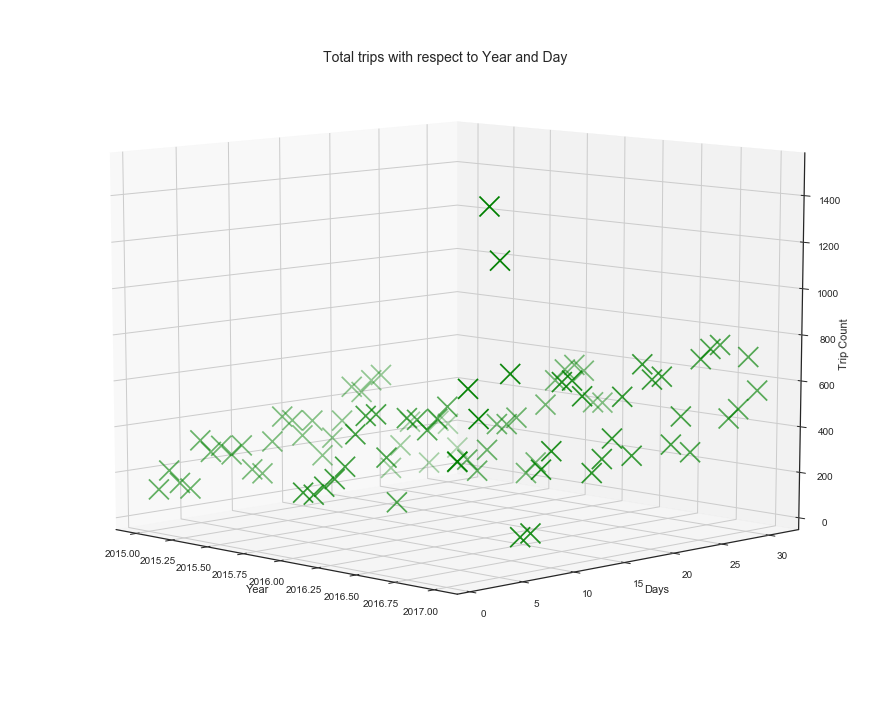

In [92]:
fig=plt.figure()
fig.set_size_inches(15.5, 12.5)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xs=master_df1['Year'],ys=master_df1['Day'],zs=master_df1['Trip Count'],color='Green',marker='x',s=20**2)
ax.set_ylabel('Days'); ax.set_xlabel('Year'); ax.set_zlabel('Trip Count')
ax.set_title("Total trips with respect to Year and Day",fontsize=14)
ax.view_init(10, -45)

#### This time we will try to plot the predicted values for our model to get a better context

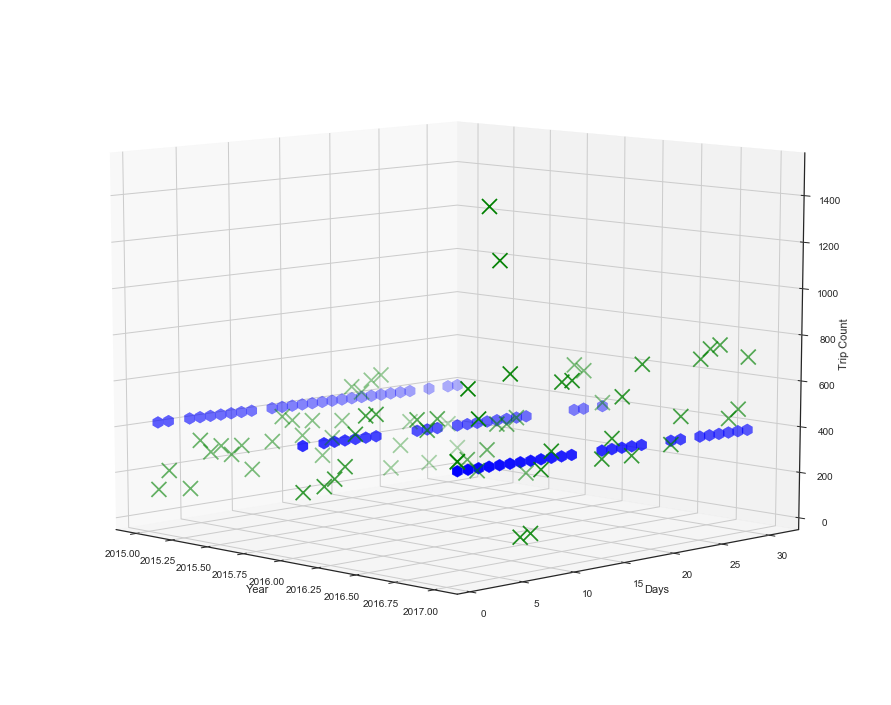

In [93]:
fig2=plt.figure()
fig2.set_size_inches(15.5, 12.5)
ax=fig2.add_subplot(111,projection='3d')
ax.scatter(xs=x_train['Year'],ys=x_train['Day'],zs=y_train,color='Green',marker='x',s=15**2)
ax.set_ylabel('Days'); ax.set_xlabel('Year'); ax.set_zlabel('Trip Count')
ax.scatter(xs=x_train['Year'], ys=x_train['Day'], zs=result.predict(x_train), color='Blue',marker='h',s=12**2)
ax.view_init(10, -45)

In [97]:
print("The rsquared value for the current model is",result.rsquared)

The rsquared value for the current model is 0.724657678127


#### One look at the r-squared value and we can say though the model fits 72% but it probably falls in the underfitting category

In [99]:
y_train_pred=result.predict(x_train)
y_test_pred=result.predict(x_test)

In [100]:
print("Train Mean Absolute Error on Training Set",metrics.mean_absolute_error(y_train, y_train_pred))
print("Root Mean Squared Error on Training Set",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Train Mean Absolute Error on Test Set",metrics.mean_absolute_error(y_test, y_test_pred))
print("Root Mean Squared Error on Test Set",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Train Mean Absolute Error on Training Set 183.105323905
Root Mean Squared Error on Training Set 250.484372457
Train Mean Absolute Error on Test Set 167.834388549
Root Mean Squared Error on Test Set 190.527572456


#### Performing Bonferroni Outlier Test to check the outliers 

In [101]:
test=result.outlier_test()

In [102]:
#Bad Data Points or Outliers
test[test['bonf(p)']<0.05]

,student_resid,unadj_p,bonf(p)
65,3.636478,0.000524,0.038260
64,4.902685,0.000006,0.000431


 #### Checking if the residuals are normally distributed or not? 

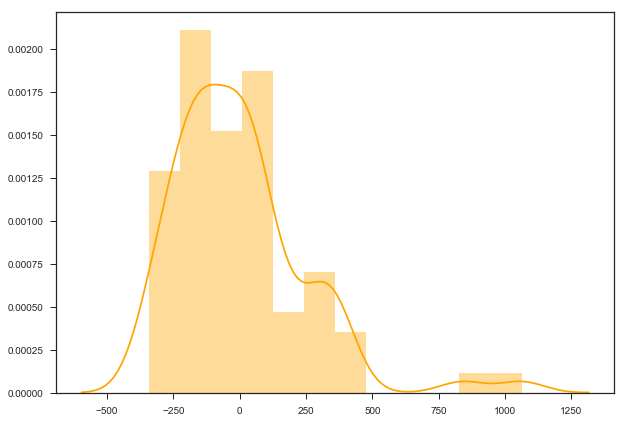

In [104]:
sb.distplot(result.resid,color='Orange')

#### Now we will try to add temperature in our model and see if we get better results using that.

In [105]:
master_df2=df1.groupby(['Day']).agg({'Temperature':'mean','tripduration':'count'}).reset_index()
master_df2.rename(columns={'tripduration':'Trip Count'},inplace=True)

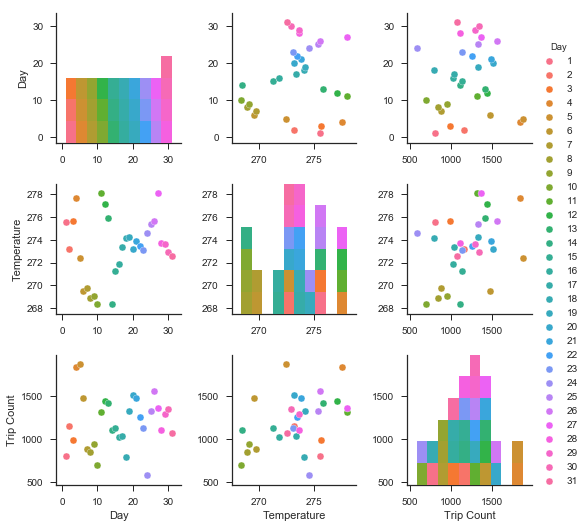

In [106]:
sb.pairplot(master_df2,hue='Day')

In [107]:
independent_variables=['Day','Temperature']
x1=master_df2[independent_variables]
y1=master_df2['Trip Count']

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,train_size=.80,random_state=1)

In [109]:
lm_master2=LinearRegression()
model=sm.OLS(y_train,x_train)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Trip Count   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     216.1
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           3.44e-15
Time:                        03:11:14   Log-Likelihood:                -168.05
No. Observations:                  24   AIC:                             340.1
Df Residuals:                      22   BIC:                             342.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Day             6.6979      6.293      1.064      0.299      -6.353      19.749
Temperature     3.9472      0.399      9.901      0.000       3.120       4.774
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                2.888
Skew:                           0.751   Prob(JB):                        0.236
Kurtosis:                       3.796   Cond. No.                         30.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

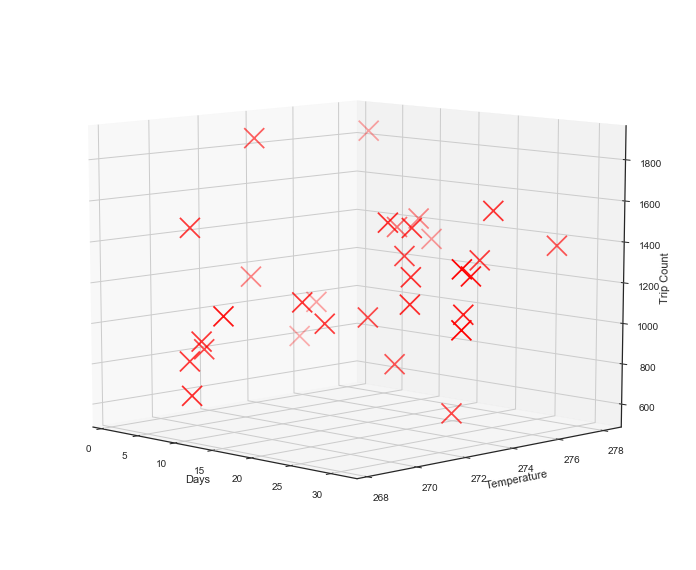

In [110]:
fig3=plt.figure()
fig3.set_size_inches(12, 10)
ax=fig3.add_subplot(111,projection='3d')
ax.scatter(xs=master_df2['Day'],ys=master_df2['Temperature'],zs=master_df2['Trip Count'],color='Red',marker='x',s=20**2)
ax.set_ylabel('Temperature'); ax.set_xlabel('Days'); ax.set_zlabel('Trip Count')
ax.view_init(10, -45)

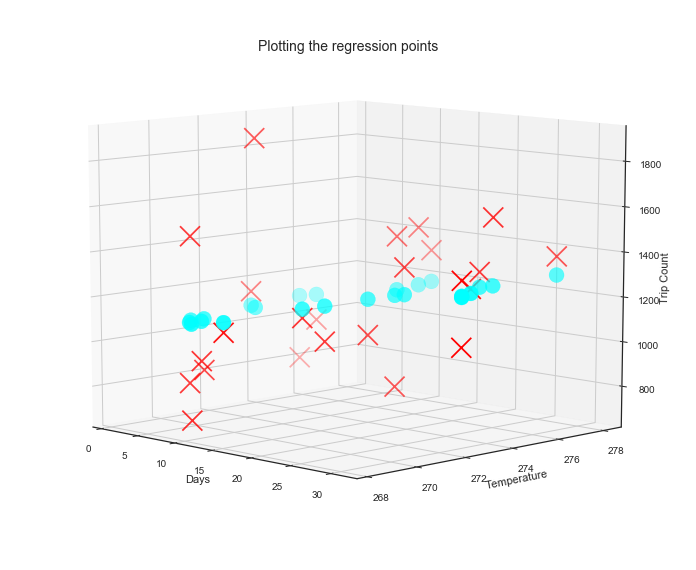

In [115]:
fig4=plt.figure()
fig4.set_size_inches(12, 10)
ax=fig4.add_subplot(111,projection='3d')
ax.scatter(xs=x_train['Day'],ys=x_train['Temperature'],zs=y_train,color='Red',marker='x',s=20**2)
ax.scatter(xs=x_train['Day'],ys=x_train['Temperature'],zs=result.predict(x_train),color='Aqua',marker='o',s=15**2)
ax.set_ylabel('Temperature'); ax.set_xlabel('Days'); ax.set_zlabel('Trip Count')
ax.set_title("Plotting the regression points",fontsize=14)
ax.view_init(10, -45)

In [116]:
print("The rsquared value for this model is",result.rsquared)

The rsquared value for this model is 0.951561338409


#### We definitely see an increase in the r-squared value which is a good sign. Lets look at the Error values for this model

In [117]:
y_train_pred=result.predict(x_train)
y_test_pred=result.predict(x_test)

In [118]:
print("Train Mean Absolute Error on Training Set",metrics.mean_absolute_error(y_train, y_train_pred))
print("Root Mean Squared Error on Training Set",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Train Mean Absolute Error on Test Set",metrics.mean_absolute_error(y_test, y_test_pred))
print("Root Mean Squared Error on Test Set",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Train Mean Absolute Error on Training Set 210.071805062
Root Mean Squared Error on Training Set 265.920823748
Train Mean Absolute Error on Test Set 319.701417772
Root Mean Squared Error on Test Set 406.558328788


#### We also notice an increase in the error values, with the increased r-squred values.

** Checking if other weather parameters(humidity, windspeed, pressure) have an impact on our model **

In [119]:
master_df3=df1.groupby(['Day']).agg({'Temperature':'mean','Humidity':'mean','Pressure':'mean','WindSpeed':'mean','WindDirection':'mean','tripduration':'count'}).reset_index()
master_df3.rename(columns={'tripduration':'Trip Count'},inplace=True)

In [120]:
summary=master_df3.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
Day,31.0,16.000000,9.092121,1.000000,8.500000,16.000000,23.500000,31.000000
Temperature,31.0,273.368009,2.790720,268.314986,272.145492,273.492034,275.486626,278.108102
Humidity,31.0,81.827673,8.276475,65.977507,77.474761,83.362349,87.610044,94.313413
Pressure,31.0,1020.113982,7.609467,1000.747875,1015.689206,1020.885088,1025.441776,1032.943236
WindSpeed,31.0,4.017981,0.933089,2.868963,3.331796,3.814907,4.613743,7.095546
WindDirection,31.0,206.308152,32.978464,118.914641,188.699765,211.415081,228.961995,253.965611
Trip Count,31.0,1197.935484,308.466523,580.000000,1007.000000,1156.000000,1390.500000,1871.000000


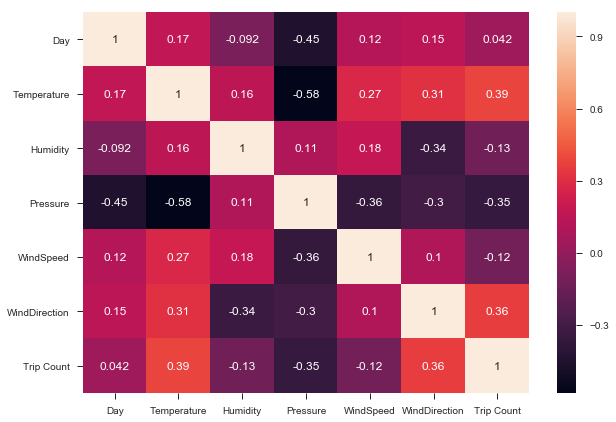

In [121]:
corr=master_df3.corr()
sb.heatmap(corr,annot=True)

#### We do notice an inverse correlation or a negative correlation between the Trip Count and Humidity, Pressure and WindSpeed

In [122]:
from pandas.tools.plotting import scatter_matrix

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A3B900EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020A3C78A5C0>]], dtype=object)

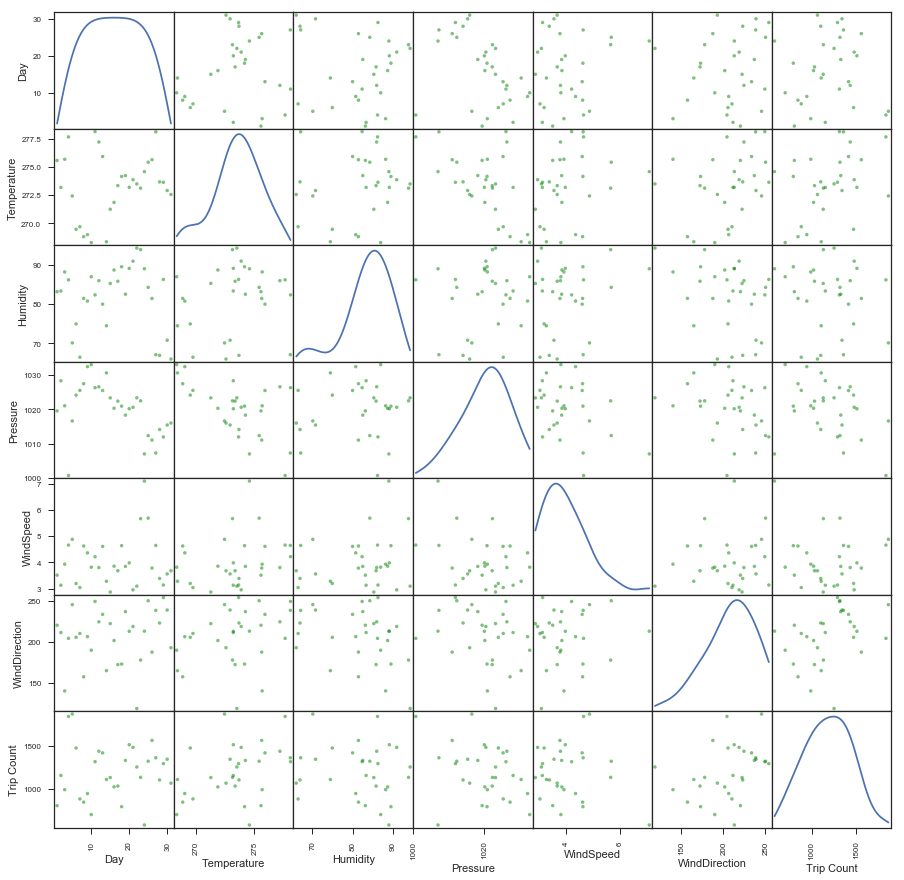

In [123]:
scatter_matrix(master_df3, alpha=0.5, figsize=(15,15), diagonal='kde',c='Green')

In [124]:
independent_variables=['Day','Temperature','Humidity','Pressure','WindSpeed','WindDirection']
x2=master_df3[independent_variables]
y2=master_df3['Trip Count']
x_train,x_test,y_train,y_test=train_test_split(x2,y2,train_size=.80,random_state=1)
lm_master3=LinearRegression()
model=sm.OLS(y_train,x_train)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Trip Count   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     97.28
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           9.99e-13
Time:                        03:19:25   Log-Likelihood:                -162.27
No. Observations:                  24   AIC:                             336.5
Df Residuals:                      18   BIC:                             343.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Day              -1.8469      6.242     -0.296      0.771     -14.961      11.268
Temperature      22.2375     15.272      1.456      0.163      -9.848      54.323
Humidity         -9.5802      7.259     -1.320      0.203     -24.831       5.670
Pressure         -4.7851      3.761     -1.272      0.219     -12.687       3.117
WindSpeed        19.5117     77.633      0.251      0.804    -143.588     182.612
WindDirection     3.3908      1.810      1.874      0.077      -0.411       7.192
==============================================================================
Omnibus:                        0.530   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.103
Skew:                           0.159   Prob(JB):                        0.950
Kurtosis:                       3.047   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
test=result.outlier_test()
test.head()

,student_resid,unadj_p,bonf(p)
18,0.225895,0.823976,1.0
10,-0.332691,0.743435,1.0
25,1.998455,0.061920,1.0
17,-0.961666,0.349698,1.0
14,0.143667,0.887453,1.0


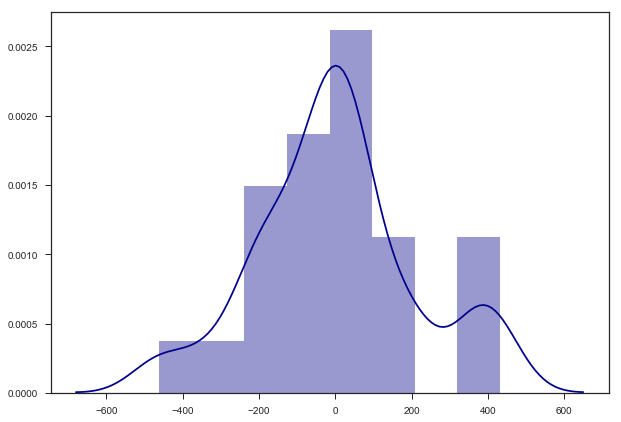

In [126]:
sb.distplot(result.resid,color='DarkBlue')

In [127]:
from sklearn.metrics import explained_variance_score

In [128]:
r2_score(y_train, result.predict(x_train))

0.43272335097817494

In [129]:
result.rsquared

0.97008443924411558

In [130]:
mean_absolute_error(y_train, result.predict(x_train))

155.67758742057501

In [131]:
np.sqrt(mean_squared_error(y_train, result.predict(x_train)))

208.98006218678012

#### Looking at the t-s Null Hypothesis Regression coeffcients for Year, Day_1, Day_2... Day_31 = 0
#### And alternate hypothesis that Year, Day 1, Day_2... Day_31 !=0. 
#### From the T- Statistic we can see that for the Year, Day_1, Day_2 etc coeffs we are able to reject the NULL Hypothesis as the T statistic lies outside the confidence interval hence proving our atlternate hypothesis that all the coefficients are relevant to the regression problem. 

In [136]:
df2=pd.get_dummies(df1, columns=['Day'])

#### Our dataset with the dummy values for the categorical variable Day

In [137]:
df2.head()

,tripduration,starttime,stoptime,start station id,end station id,bikeid,usertype,birth year,gender,Time subset,...,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31
0,9.033333,2015-01-01 00:21:44,2015-01-01 00:30:47,115,96,277,Subscriber,1984,1,0,...,0,0,0,0,0,0,0,0,0,0
1,7.300000,2015-01-01 00:27:03,2015-01-01 00:34:21,80,95,648,Subscriber,1985,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.233333,2015-01-01 00:31:31,2015-01-01 00:35:46,91,68,555,Subscriber,1974,1,0,...,0,0,0,0,0,0,0,0,0,0
3,7.200000,2015-01-01 00:53:46,2015-01-01 01:00:58,115,96,1307,Subscriber,1987,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12.250000,2015-01-01 01:07:06,2015-01-01 01:19:21,105,88,177,Customer,1986,2,1,...,0,0,0,0,0,0,0,0,0,0


In [161]:
test_set=df2.groupby(['Year','Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7','Day_8','Day_9','Day_10','Day_11','Day_12','Day_13','Day_14','Day_15','Day_16','Day_17','Day_18','Day_19','Day_20','Day_21','Day_22','Day_23','Day_24','Day_25','Day_26','Day_27','Day_28','Day_29','Day_30','Day_31']).agg({'tripduration':'count'}).reset_index()
test_set.rename(columns={'tripduration':'Trip Count'},inplace=True)

In [162]:
independent_variables=['Year','Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7','Day_8','Day_9','Day_10','Day_11','Day_12','Day_13','Day_14','Day_15','Day_16','Day_17','Day_18','Day_19','Day_20','Day_21','Day_22','Day_23','Day_24','Day_25','Day_26','Day_27','Day_28','Day_29','Day_30','Day_31']
y3=test_set['Trip Count']
x3=test_set[independent_variables]

In [163]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x3,y3,train_size=.80,random_state=1)
lm_test=LinearRegression()
model_test=sm.OLS(y_train2,x_train2)
result_test=model_test.fit()
result_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Trip Count   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     2.195
Date:                Fri, 02 Feb 2018   Prob (F-statistic):            0.00944
Time:                        04:27:48   Log-Likelihood:                -471.09
No. Observations:                  73   AIC:                             1006.
Df Residuals:                      41   BIC:                             1079.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year         175.3118     30.058      5.832      0.000     114.609     236.015
Day_1      -3.532e+05   6.06e+04     -5.830      0.000   -4.76e+05   -2.31e+05
Day_2       -3.53e+05   6.06e+04     -5.825      0.000   -4.75e+05   -2.31e+05
Day_3      -3.531e+05   6.06e+04     -5.825      0.000   -4.75e+05   -2.31e+05
Day_4      -3.528e+05   6.06e+04     -5.822      0.000   -4.75e+05    -2.3e+05
Day_5      -3.526e+05   6.06e+04     -5.820      0.000   -4.75e+05    -2.3e+05
Day_6      -3.529e+05   6.06e+04     -5.824      0.000   -4.75e+05   -2.31e+05
Day_7      -3.532e+05   6.06e+04     -5.829      0.000   -4.76e+05   -2.31e+05
Day_8       -3.53e+05   6.06e+04     -5.829      0.000   -4.75e+05   -2.31e+05
Day_9      -3.531e+05   6.06e+04     -5.827      0.000   -4.75e+05   -2.31e+05
Day_10     -3.532e+05   6.06e+04     -5.829      0.000   -4.76e+05   -2.31e+05
Day_11      -3.53e+05   6.06e+04     -5.828      0.000   -4.75e+05   -2.31e+05
Day_12      -3.53e+05   6.06e+04     -5.827      0.000   -4.75e+05   -2.31e+05
Day_13      -3.53e+05   6.06e+04     -5.825      0.000   -4.75e+05   -2.31e+05
Day_14     -3.531e+05   6.06e+04     -5.826      0.000   -4.75e+05   -2.31e+05
Day_15     -3.531e+05   6.06e+04     -5.826      0.000   -4.75e+05   -2.31e+05
Day_16     -3.531e+05   6.06e+04     -5.827      0.000   -4.75e+05   -2.31e+05
Day_17      -3.53e+05   6.06e+04     -5.826      0.000   -4.75e+05   -2.31e+05
Day_18     -3.531e+05   6.06e+04     -5.829      0.000   -4.75e+05   -2.31e+05
Day_19      -3.53e+05   6.06e+04     -5.828      0.000   -4.75e+05   -2.31e+05
Day_20      -3.53e+05   6.06e+04     -5.824      0.000   -4.75e+05   -2.31e+05
Day_21     -3.529e+05   6.06e+04     -5.823      0.000   -4.75e+05    -2.3e+05
Day_22      -3.53e+05   6.06e+04     -5.825      0.000   -4.75e+05   -2.31e+05
Day_23     -3.529e+05   6.06e+04     -5.824      0.000   -4.75e+05   -2.31e+05
Day_24     -3.532e+05   6.06e+04     -5.829      0.000   -4.76e+05   -2.31e+05
Day_25      -3.53e+05   6.06e+04     -5.825      0.000   -4.75e+05   -2.31e+05
Day_26     -3.529e+05   6.06e+04     -5.824      0.000   -4.75e+05   -2.31e+05
Day_27     -3.528e+05   6.06e+04     -5.821      0.000   -4.75e+05    -2.3e+05
Day_28     -3.531e+05   6.06e+04     -5.826      0.000   -4.75e+05   -2.31e+05
Day_29      -3.53e+05   6.06e+04     -5.824      0.000   -4.75e+05   -2.31e+05
Day_30      -3.53e+05   6.06e+04     -5.825      0.000   -4.75e+05   -2.31e+05
Day_31     -3.531e+05   6.06e+04     -5.827      0.000   -4.75e+05   -2.31e+05
==============================================================================
Omnibus:                       23.472   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.530
Skew:                           0.920   Prob(JB):                     3.57e-15
Ku

In [143]:
result_test.params

Year         175.311828
Day_1    -353167.989247
Day_2    -352953.145161
Day_3    -353090.301075
Day_4    -352814.311828
Day_5    -352644.645161
Day_6    -352908.145161
Day_7    -353240.645161
Day_8    -353023.333333
Day_9    -353113.311828
Day_10   -353194.978495
Day_11   -353043.489247
Day_12   -352982.489247
Day_13   -352955.645161
Day_14   -353058.978495
Day_15   -353051.311828
Day_16   -353087.645161
Day_17   -353036.645161
Day_18   -353126.489247
Day_19   -353048.489247
Day_20   -352986.301075
Day_21   -352876.145161
Day_22   -353001.145161
Day_23   -352935.145161
Day_24   -353235.311828
Day_25   -352987.978495
Day_26   -352907.311828
Day_27   -352835.301075
Day_28   -353060.645161
Day_29   -352989.301075
Day_30   -352964.145161
Day_31   -353072.978495
dtype: float64

#### Error values for this model

In [164]:
print("MAE for training set",mean_absolute_error(y_train2,result_test.predict(x_train2)))
print("RMSE for training set",np.sqrt(mean_squared_error(y_train2,result_test.predict(x_train2))))
print("MAE for testing set",mean_absolute_error(y_test2,result_test.predict(x_test2)))
print("RMSE for testing set",np.sqrt(mean_squared_error(y_test2,result_test.predict(x_test2))))

MAE for training set 111.680659891
RMSE for training set 153.609047362
MAE for testing set 173.233729485
RMSE for testing set 222.656110054


### Plot of the residuals- that should always be normally distributed.

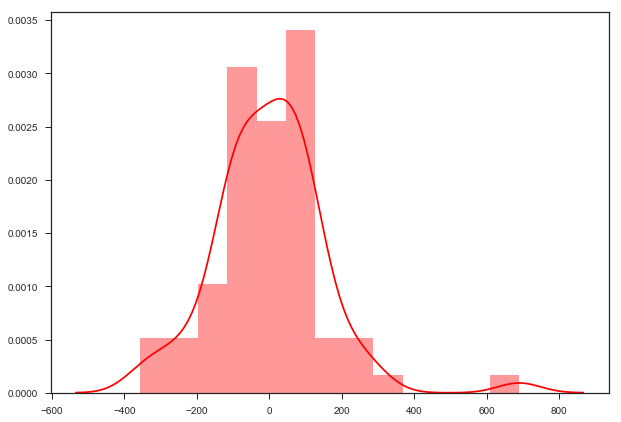

In [151]:
sb.distplot(result_test.resid,color='Red')

## Conclusion: We can conclude that day and year are key coefficients that affect our trips whereas our other variables like Humidity and Pressure more or less play no role. For all the other variables like gender and Temperature they dont like in the ideal t-statistic value.